In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
series = pd.read_csv("C:\\Users\\Ayisha\\Downloads\\HDFC.csv",index_col=0,parse_dates=True,squeeze=False,
                    usecols=['Date','Open','High','Low','Close','Volume'])
series.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,293.5,293.50,293.5,293.50,22744
2000-01-04,317.0,317.00,297.0,304.05,255251
2000-01-05,290.0,303.90,285.0,292.80,269087
2000-01-06,301.0,314.00,295.0,296.45,305916
2000-01-07,290.0,296.35,281.0,286.55,197039


<AxesSubplot:>

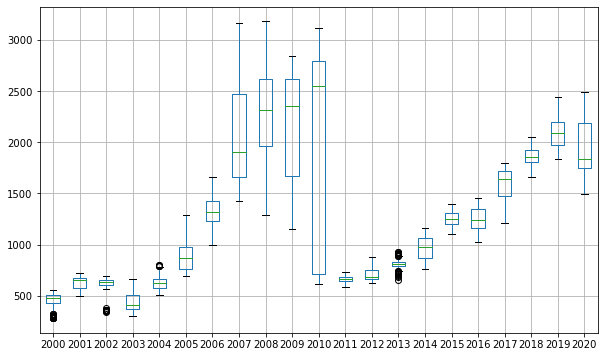

In [35]:
data = pd.read_csv("C:\\Users\\Ayisha\\Downloads\\HDFC.csv",index_col=0,parse_dates=True,squeeze=True,
                    usecols=['Date','Open','High','Low','Close','Volume'])
from pandas import Grouper
groups = data['Close'].groupby(Grouper(freq='A'))
year = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
year.columns = range(2000,2021)
plt.figure(figsize=(10,6))
year.boxplot()

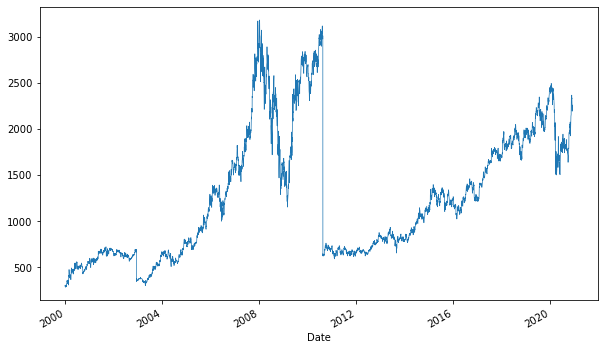

In [49]:
plt.figure(figsize=(10,6))
series.Close.plot(linewidth = 0.7)
plt.show()

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

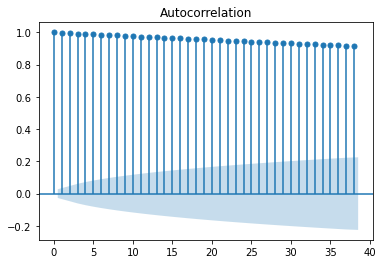

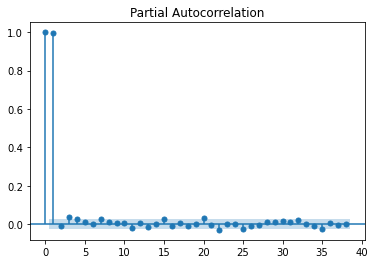

In [6]:
plot_acf(series.Close)
plot_pacf(series.Close)
plt.show()

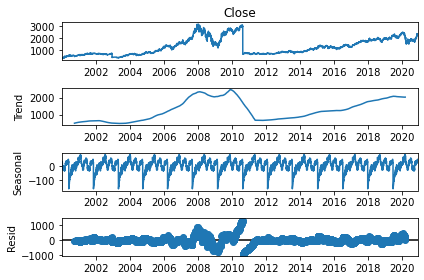

In [7]:
seasonal_decompose(series['Close'],freq=365).plot()
plt.show()

In [8]:
X = np.log(series.Close).values
result = adfuller(X)
print('ADF Statistic: %.3f' %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key , value in result[4].items():
    print('\t%s: %.3f' % (key,abs(value)))

ADF Statistic: -2.459
p-value: 0.125656
Critical Values:
	1%: 3.432
	5%: 2.862
	10%: 2.567


In [9]:
def kpss_test(series,**kw):
    statistic, p_value, n_lags, critical_values = kpss(series,**kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value:{p_value}')
    print(f'num lags:{n_lags}')
    print('Critical values:')
    for key , value in critical_values.items():
        print(f' {key}: {value}')
    print(f'Result: The series is {"not " if p_value <0.05 else ""}stationary')

In [10]:
kpss_test(X)

KPSS Statistic: 5.43822031389451
p-value:0.01
num lags:33
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is not stationary


C:\Users\Ayisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1882: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [11]:
X1 =(np.log(series.Close) - np.log(series.Close).shift(1)).dropna().values
kpss_test(X1)

KPSS Statistic: 0.08238752436221417
p-value:0.1
num lags:33
Critical values:
 10%: 0.347
 5%: 0.463
 2.5%: 0.574
 1%: 0.739
Result: The series is stationary


C:\Users\Ayisha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1886: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
model = SARIMAX(series.Close,order = (1,1,1), seasonal_order=(1,1,1,12)).fit()

<AxesSubplot:xlabel='Date'>

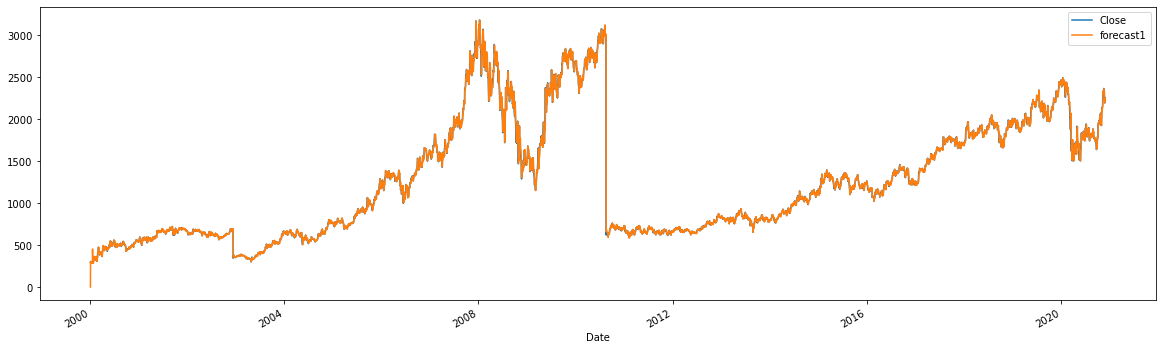

In [18]:
series['forecast1'] = model.predict()
series[['Close','forecast1']].plot(figsize=(20,6))

In [39]:
model.forecast(12)

5204    2254.830411
5205    2259.194548
5206    2259.989935
5207    2262.533660
5208    2261.827915
5209    2257.516720
5210    2257.857936
5211    2257.001944
5212    2254.479962
5213    2253.616740
5214    2254.873220
5215    2258.733484
Name: predicted_mean, dtype: float64

In [44]:
print("Bias :",bias(model.resid))
print("MAPE :",mape(series.Close,model.resid))

Bias : 0.910874142625226
MAPE : 5.727794498851408


In [45]:
from sklearn.metrics import mean_absolute_error

In [43]:
mean_absolute_error(series.Close,series.forecast1)

21.305892925791692